# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time

font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})


# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}




common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    


'delta for electron pressure':"500c",    

'mass function' : 'M500',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non_linear' : 'hmcode',
'hm_consistency' : 1,
    
# for the truncation of the pressure profile important!
'pressure profile':'Custom. GNFW',
'x_outSZ': 4.,
}

2024-02-22 09:20:49.563072: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-22 09:20:49.563097: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-22 09:20:49.563105: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-22 09:20:49.563136: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-22 09:20:49.563155: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Pressure profile and tszspecturm 

In [5]:
%%time
M = Class()
M.set(common_params)
M.set(cosmo_params)
M.set({
# class_sz parameters:
'output':'tSZ_1h, tSZ_2h',
'z_min' : 0.05,

'use_fft_for_profiles_transform':0, # in fact for custom gnfw the FFT routine is not implementes but always done with gsl_integration_qawo
    
    

# 'c500' : 1.156,
# 'alphaGNFW' : 1.062,
'betaGNFW' : 2.507,
# 'gammaGNFW' : 0.3292,

'ell_max' : 9950.0,
'ell_min' : 5,
'dlogell': 0.1,
        })
M.compute_class_szfast()
cl_yy= M.cl_sz()

cl_ell=np.array(cl_yy['ell'])
cl_1h=np.array(cl_yy['1h'])
cl_2h=np.array(cl_yy['2h'])

CPU times: user 9.89 s, sys: 187 ms, total: 10.1 s
Wall time: 1.49 s


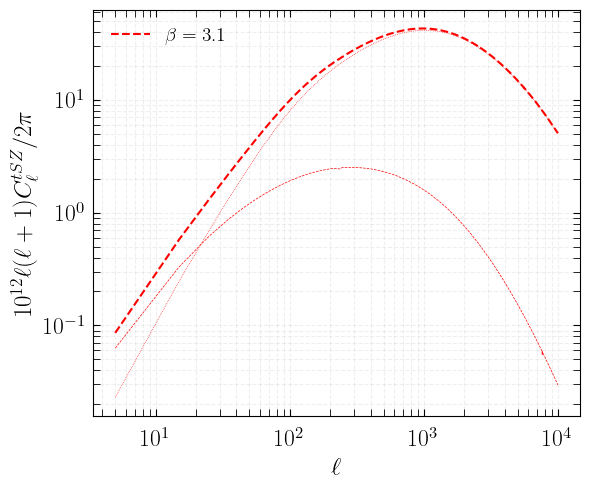

In [7]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5

fig,ax = plt.subplots(figsize=(6,5))
plt.xscale('log')
plt.yscale('log')
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)


plt.plot(cl_ell, cl_1h*0.35, c='red', ls=':',lw=0.5)
plt.plot(cl_ell, cl_2h*0.35, c='red', ls='--',lw=0.5)
plt.plot(cl_ell, (cl_1h+cl_2h)*0.35, ls='--', c='red', label=r'$\beta = 3.1$')



# plt.xlim([10, 10050])
# plt.ylim([1e-3, 2])
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
plt.ylabel(r'$10^{12}\ell(\ell+1)C_{\ell}^{tSZ}/2\pi$',size=title_size)
plt.xlabel('$\ell$',size=title_size)
plt.legend(loc=2,fontsize=14,frameon=False)

fig.tight_layout()
# plt.savefig('figures/tSZ_1h_2h_all.png',dpi=300)

In [8]:
# pick a mass and a redshift
m = 3e13*cosmo_params['H0']/100. # amodeo: 3e13 Msun
z = 0.55 # amodeo: z=0.55

# 1-halo pressure
pe = np.vectorize(M.get_pressure_P_over_P_delta_at_x_gnfw_500c)

In [9]:
x_500c  = np.geomspace(0.01,30,200) # this is r/r500c

betaGNFWp = 1.

pe1h = pe(x_500c,
          betaGNFW = betaGNFWp)

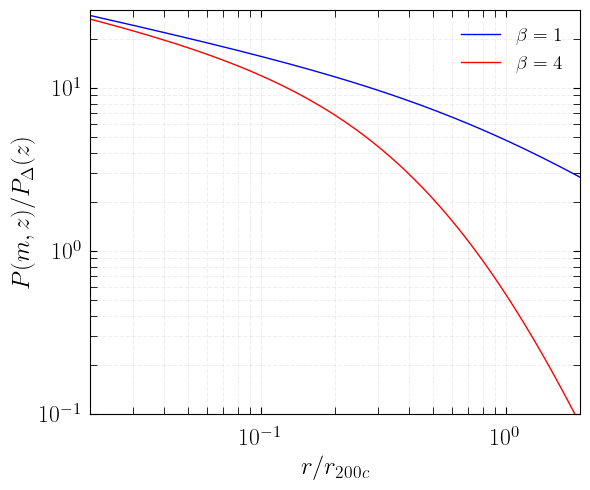

In [10]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig,ax = plt.subplots(figsize=(6,5))
plt.xscale('log')
plt.yscale('log')
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(m,z)/P_\Delta(z)$ ",size=title_size)
ax.set_xlabel(r"$r/r_{200c}$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(1e-1,3e1)
ax.set_xlim(2e-2,2.)

betaGNFWp = 1.

pe1h = pe(x_500c,
          betaGNFW = betaGNFWp)

ax.plot(x_500c,pe1h, label = r'$\beta = 1$',ls='-',c='blue',lw=1.)

betaGNFWp = 4.

pe1h = pe(x_500c,
          betaGNFW = betaGNFWp)

ax.plot(x_500c,pe1h, label = r'$\beta = 4$',ls='-',c='red',lw=1.)


# ax.plot(x_200c,pe_2h,label='2h',ls='-',lw=0.7)
# ax.plot(x_200c,pe_1h+pe_2h,label='Total',ls='-',c='k')
ax.legend(frameon=False,fontsize=14)
fig.tight_layout()
# plt.savefig('figures/pressure_profile_2betas.png',dpi=300)

